<a href="https://colab.research.google.com/github/FUDGEMASTER/Breast_cancer_case-study/blob/master/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**



In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.svm import SVC





/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1FttBvXlR5lC45E2Y3INmpJeuiAXhytfj"})   
downloaded.GetContentFile('hackathon dataset.csv')       

In [ ]:
hackathon = pd.read_csv('hackathon dataset.csv') #Load the dataset
hackathon.head()

,1,39,4,0,0.1,0.2,0.3,0.4,0.5,195,106,70,26.97,80,77,0.6
0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
1,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
2,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0


## **Renaming Columns**

In [ ]:
new_row = pd.DataFrame({'1':1, '39':39, '4':4, '0':0, '0.1':0.1, '0.2':0.2, '0.3':0.3, '0.4':0.4, '0.5':0.5, '195':195, '106':106, '70':70, '26.97':26.97, '80':80,'77':77, '0.6':0.6 }, index =[0])
hackathon = pd.concat([new_row, hackathon]).reset_index(drop = True) 
#Appending a row at the beginning of the dataset with the same value as columnname
hackathon.head(5)

,1,39,4,0,0.1,0.2,0.3,0.4,0.5,195,106,70,26.97,80,77,0.6
0,1,39,4.0,0,0.1,0.2,0.3,0.4,0.5,195.0,106.0,70.0,26.97,80.0,77.0,0.6
1,0,46,2.0,0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1,48,1.0,1,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0,61,3.0,1,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0,46,3.0,1,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [ ]:
hackathon = hackathon.rename(columns = {'1':1, '39':'2', '4':'3', 
                        '0':'4', '0.1':'5', '0.2':'6', 
                        '0.3':'7', '0.4':'8', '0.5':'9', '195':'10', '106':'11', '70':'12', '26.97':'13', '80':'14','77':'15', '0.6':'16' })
hackathon.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,39,4.0,0,0.1,0.2,0.3,0.4,0.5,195.0,106.0,70.0,26.97,80.0,77.0,0.6
1,0,46,2.0,0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1,48,1.0,1,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0,61,3.0,1,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0,46,3.0,1,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [ ]:
#hackathon = hackathon.drop(1)     #dropping duplicated rows 
hackathon

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,39,4.0,0,0.1,0.2,0.3,0.4,0.5,195.0,106.0,70.0,26.97,80.0,77.0,0.6
1,0,46,2.0,0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1,48,1.0,1,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0,61,3.0,1,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0,46,3.0,1,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0,44,1.0,1,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0.0
4237,0,52,2.0,0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0
4238,1,40,3.0,0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0


In [ ]:
hackathon = hackathon.reset_index(drop = True)  #resetting index due to dropping duplicate rows
hackathon

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,39,4.0,0,0.1,0.2,0.3,0.4,0.5,195.0,106.0,70.0,26.97,80.0,77.0,0.6
1,0,46,2.0,0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1,48,1.0,1,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0,61,3.0,1,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0,46,3.0,1,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0,44,1.0,1,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0.0
4237,0,52,2.0,0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0
4238,1,40,3.0,0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0


In [ ]:
hackathon.iloc[0,4:9] = 0
hackathon.iloc[0,15] = 0
hackathon

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,39,4.0,0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0,46,2.0,0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1,48,1.0,1,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0,61,3.0,1,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0,46,3.0,1,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0,44,1.0,1,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0.0
4237,0,52,2.0,0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0
4238,1,40,3.0,0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0


# **Step 1: Check for Missing Values and Edit**



In [ ]:
missing_values_count = hackathon.isnull().sum()   #count the no. of missing values per column
missing_values_count

1       0
2       0
3     105
4       0
5      29
6      53
7       0
8       0
9       0
10     50
11      0
12      0
13     19
14      1
15    388
16      0
dtype: int64

In [ ]:
total_cells = np.product(hackathon.shape)     #total cells in the dataset
total_missing = missing_values_count.sum()    #cells with missing values(NaN)

In [ ]:
percent_missing = (total_missing/total_cells)*100
percent_missing                               #percentage of values missing 

0.9507665094339623

In [ ]:
#as data missing is the dataset is a low percentage, we use imputation as dropping can lead to loss of data
my_imputer = SimpleImputer()

In [ ]:
imputed_hackathon = pd.DataFrame(my_imputer.fit_transform(hackathon))   #Checkpoint 1

In [ ]:
imputed_hackathon.columns = hackathon.columns   #we put back column names removed by imputation
imputed_hackathon

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,39.0,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.000000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.000000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.000000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.029615,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.000000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.963655,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.000000,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000,0.0


In [ ]:
#Checking Imputation Effect
missing_values_count = imputed_hackathon.isnull().sum()   #count the no. of missing values per column
missing_values_count

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

## **Detecting and Removing Outliers**

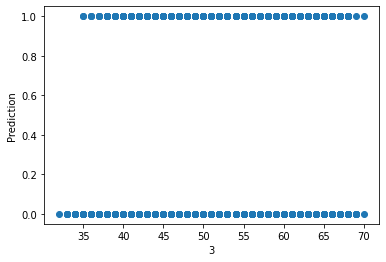

In [ ]:
#Column 3
#Comparing scatterplot of every numerical data column with the output column
fig,ax = plt.subplots()
ax.scatter(x = imputed_hackathon['2'], y = imputed_hackathon['16'])
plt.ylabel('Prediction')
plt.xlabel('3')
plt.show()
#no outliers

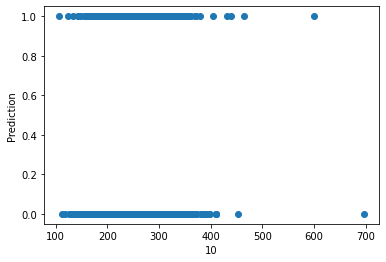

In [ ]:
#Column 10
fig,ax = plt.subplots()
ax.scatter(x = imputed_hackathon['10'], y = imputed_hackathon['16'])
plt.ylabel('Prediction')
plt.xlabel('10')
plt.show()

In [ ]:
#from the scatterplot, we see that values greater then 500 are anomalies
imputed_hackathon[imputed_hackathon['10'] > 500]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1111,0.0,52.0,2.000000,0.0,0.0,0.0,0.0,1.0,1.0,600.0,159.5,94.0,28.27,78.0,140.0,1.0
3160,1.0,51.0,1.979444,1.0,9.0,0.0,0.0,1.0,0.0,696.0,157.0,87.0,24.44,95.0,84.0,0.0


In [ ]:
#taking mean value of the column to replace the outlier values
mean10 = np.mean(imputed_hackathon['10'])

In [ ]:
#replacing outliers
imputed_hackathon.iloc[1111,9] = mean10
imputed_hackathon.iloc[3160,9] = mean10

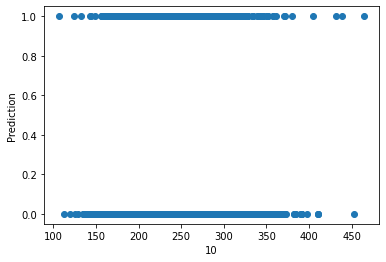

In [ ]:
fig,ax = plt.subplots()
ax.scatter(x = imputed_hackathon['10'], y = imputed_hackathon['16'])
plt.ylabel('Prediction')
plt.xlabel('10')
plt.show()
#the plot after outliers have been eliminated

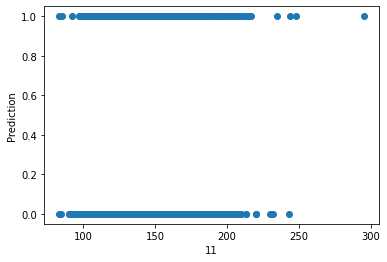

In [ ]:
#Column 11
fig,ax = plt.subplots()
ax.scatter(x = imputed_hackathon['11'], y = imputed_hackathon['16'])
plt.ylabel('Prediction')
plt.xlabel('11')
plt.show()

In [ ]:
imputed_hackathon[imputed_hackathon['11']>250]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
481,0.0,64.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,253.0,295.0,135.0,38.82,92.0,70.0,1.0


In [ ]:
mean11 = np.mean(imputed_hackathon['11'])
mean11

132.35459905660377

In [ ]:
imputed_hackathon.iloc[481,10] = mean11

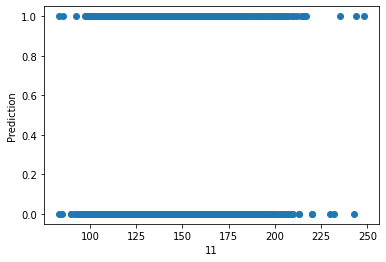

In [ ]:
fig,ax = plt.subplots()
ax.scatter(x = imputed_hackathon['11'], y = imputed_hackathon['16'])
plt.ylabel('Prediction')
plt.xlabel('11')
plt.show()

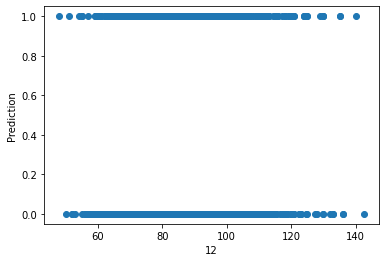

In [ ]:
#Column 12
fig,ax = plt.subplots()
ax.scatter(x = imputed_hackathon['12'], y = imputed_hackathon['16'])
plt.ylabel('Prediction')
plt.xlabel('12')
plt.show()
#no outliers

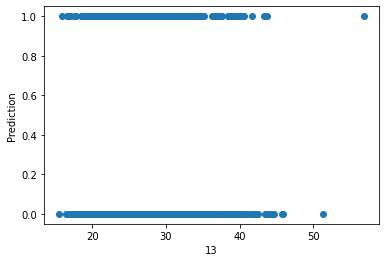

In [ ]:
#Column 13
fig,ax = plt.subplots()
ax.scatter(x = imputed_hackathon['13'], y = imputed_hackathon['16'])
plt.ylabel('Prediction')
plt.xlabel('13')
plt.show()

In [ ]:
imputed_hackathon[imputed_hackathon['13']>50]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
2657,0.0,55.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208.0,190.0,130.0,56.80,90.0,86.0,1.0
3927,0.0,61.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,225.0,194.0,111.0,51.28,80.0,103.0,0.0


In [ ]:
mean13 = np.mean(imputed_hackathon['13'])
mean13

25.800800758114182

In [ ]:
imputed_hackathon.iloc[2657, 12] = mean13
imputed_hackathon.iloc[3927, 12] = mean13

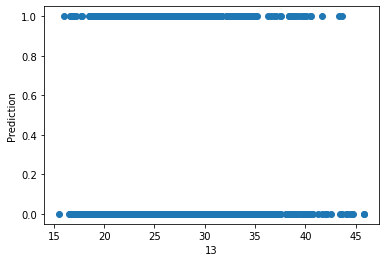

In [ ]:
fig,ax = plt.subplots()
ax.scatter(x = imputed_hackathon['13'], y = imputed_hackathon['16'])
plt.ylabel('Prediction')
plt.xlabel('13')
plt.show()

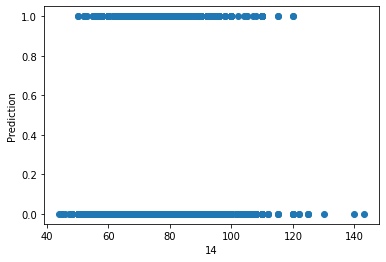

In [ ]:
#Column 14
fig,ax = plt.subplots()
ax.scatter(x = imputed_hackathon['14'], y = imputed_hackathon['16'])
plt.ylabel('Prediction')
plt.xlabel('14')
plt.show()

In [ ]:
imputed_hackathon[imputed_hackathon['14']>130]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
339,0.0,64.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,312.0,160.0,82.0,27.59,140.0,94.0,0.0
3142,0.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,257.0,133.0,94.0,17.71,143.0,75.0,0.0


In [ ]:
mean14 = np.mean(imputed_hackathon['14'])

In [ ]:
imputed_hackathon.iloc[339,13] = mean14
imputed_hackathon.iloc[3142,13] = mean14

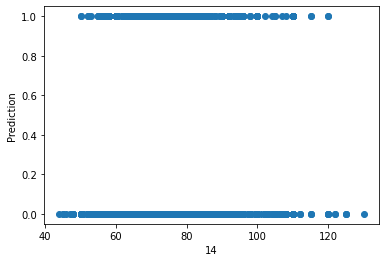

In [ ]:
fig,ax = plt.subplots()
ax.scatter(x = imputed_hackathon['14'], y = imputed_hackathon['16'])
plt.ylabel('Prediction')
plt.xlabel('14')
plt.show()

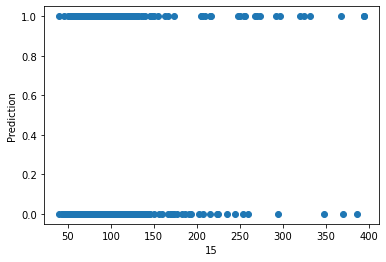

In [ ]:
fig,ax = plt.subplots()
ax.scatter(x = imputed_hackathon['15'], y = imputed_hackathon['16'])
plt.ylabel('Prediction')
plt.xlabel('15')
plt.show()

In [ ]:
imputed_hackathon[imputed_hackathon['15']>350]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
2406,0.0,62.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,233.0,130.0,87.0,21.34,85.0,386.0,0.0
2893,1.0,62.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,346.0,102.5,66.5,17.17,80.0,394.0,1.0
2909,0.0,67.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,303.0,204.0,96.0,27.86,75.0,394.0,1.0
3844,0.0,62.0,3.0,1.0,20.0,1.0,0.0,1.0,1.0,358.0,215.0,110.0,37.62,110.0,368.0,1.0
3971,1.0,64.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,195.0,176.0,78.0,24.90,95.0,370.0,0.0


In [ ]:
mean15 = np.mean(imputed_hackathon['15'])
mean15

81.96365524402951

In [ ]:
imputed_hackathon.iloc[2406, 14] = mean15
imputed_hackathon.iloc[2893, 14] = mean15
imputed_hackathon.iloc[2909, 14] = mean15
imputed_hackathon.iloc[3844, 14] = mean15
imputed_hackathon.iloc[3971, 14] = mean15

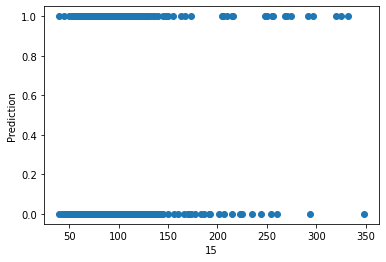

In [ ]:
fig,ax = plt.subplots()
ax.scatter(x = imputed_hackathon['15'], y = imputed_hackathon['16'])
plt.ylabel('Prediction')
plt.xlabel('15')
plt.show()

## **Skewness and Transformation(Normalization)**

In [ ]:
skewValue = imputed_hackathon.skew()
skewValue

1      0.285997
2      0.228867
3      0.697413
4      0.023595
5      1.251336
6      5.586462
7     12.912160
8      0.818827
9      5.995907
10     0.529557
11     1.076197
12     0.713250
13     0.861341
14     0.587570
15     5.438928
16     1.940516
dtype: float64

In [ ]:
#Skewness value is large for 6,7,9,11,15,16
#Only Columns with numerical data are considered for normalization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

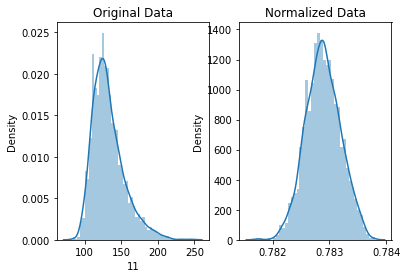

In [ ]:
#Column 11
normalized_data11 = stats.boxcox(imputed_hackathon['11']) #applying boxcox transformation

fig, ax=plt.subplots(1,2)

sns.distplot(imputed_hackathon['11'], ax=ax[0])   #Original data visualization
ax[0].set_title("Original Data")
sns.distplot(normalized_data11[0] , ax=ax[1])     #After normalization visualization
ax[1].set_title("Normalized Data")



In [ ]:
new_11 = pd.Series(normalized_data11[0])
new_11

0       0.782441
1       0.782760
2       0.782872
3       0.783176
4       0.782912
          ...   
4235    0.782927
4236    0.782856
4237    0.782964
4238    0.783068
4239    0.782957
Length: 4240, dtype: float64

In [ ]:
imputed_hackathon['11'] = new_11            #Replacing with transformed values
imputed_hackathon

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,39.0,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,195.0,0.782441,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,250.0,0.782760,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.000000,0.0,0.0,0.0,245.0,0.782872,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.000000,0.0,1.0,0.0,225.0,0.783176,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.000000,0.0,0.0,0.0,285.0,0.782912,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.029615,0.0,0.0,0.0,248.0,0.782927,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.000000,0.0,0.0,0.0,210.0,0.782856,87.0,19.16,86.0,81.963655,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,269.0,0.782964,83.0,21.47,80.0,107.000000,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.000000,0.0,1.0,0.0,185.0,0.783068,98.0,25.60,67.0,72.000000,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

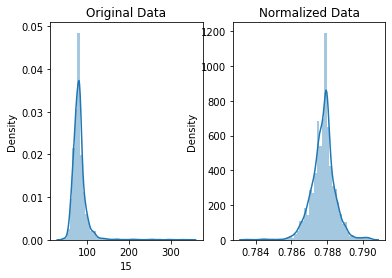

In [ ]:
#Column 15
normalized_data15 = stats.boxcox(imputed_hackathon['15']) #applying boxcox transformation

fig, ax=plt.subplots(1,2)

sns.distplot(imputed_hackathon['15'], ax=ax[0])   #Original data visualization
ax[0].set_title("Original Data")
sns.distplot(normalized_data15[0] , ax=ax[1])  
ax[1].set_title("Normalized Data")



In [ ]:
new_15 = normalized_data15[0]
new_15

array([0.78769816, 0.78764385, 0.78728081, ..., 0.78880721, 0.78740944,
       0.78785189])

In [ ]:
imputed_hackathon['15'] = new_15
imputed_hackathon

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,39.0,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,195.0,0.782441,70.0,26.97,80.0,0.787698,0.0
1,0.0,46.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,250.0,0.782760,81.0,28.73,95.0,0.787644,0.0
2,1.0,48.0,1.0,1.0,20.0,0.000000,0.0,0.0,0.0,245.0,0.782872,80.0,25.34,75.0,0.787281,0.0
3,0.0,61.0,3.0,1.0,30.0,0.000000,0.0,1.0,0.0,225.0,0.783176,95.0,28.58,65.0,0.788701,1.0
4,0.0,46.0,3.0,1.0,23.0,0.000000,0.0,0.0,0.0,285.0,0.782912,84.0,23.10,85.0,0.788081,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.029615,0.0,0.0,0.0,248.0,0.782927,72.0,22.00,84.0,0.788123,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.000000,0.0,0.0,0.0,210.0,0.782856,87.0,19.16,86.0,0.787946,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,269.0,0.782964,83.0,21.47,80.0,0.788807,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.000000,0.0,1.0,0.0,185.0,0.783068,98.0,25.60,67.0,0.787409,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

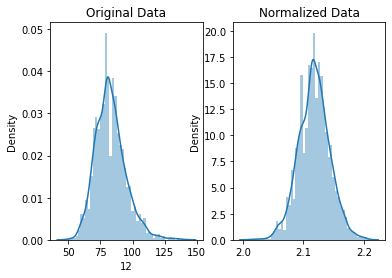

In [ ]:
#Column 12
normalized_data12 = stats.boxcox(imputed_hackathon['12']) #applying boxcox transformation

fig, ax=plt.subplots(1,2)

sns.distplot(imputed_hackathon['12'], ax=ax[0])   #Original data visualization
ax[0].set_title("Original Data")
sns.distplot(normalized_data12[0] , ax=ax[1])  
ax[1].set_title("Normalized Data")

In [ ]:
new_12 = normalized_data12[0]
new_12

array([2.08831659, 2.11585629, 2.11357224, ..., 2.12030926, 2.14954798,
       2.12671699])

In [ ]:
imputed_hackathon['12'] = new_12
imputed_hackathon

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,39.0,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,195.0,0.782441,2.088317,26.97,80.0,0.787698,0.0
1,0.0,46.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,250.0,0.782760,2.115856,28.73,95.0,0.787644,0.0
2,1.0,48.0,1.0,1.0,20.0,0.000000,0.0,0.0,0.0,245.0,0.782872,2.113572,25.34,75.0,0.787281,0.0
3,0.0,61.0,3.0,1.0,30.0,0.000000,0.0,1.0,0.0,225.0,0.783176,2.144218,28.58,65.0,0.788701,1.0
4,0.0,46.0,3.0,1.0,23.0,0.000000,0.0,0.0,0.0,285.0,0.782912,2.122480,23.10,85.0,0.788081,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.029615,0.0,0.0,0.0,248.0,0.782927,2.093754,22.00,84.0,0.788123,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.000000,0.0,0.0,0.0,210.0,0.782856,2.128784,19.16,86.0,0.787946,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,269.0,0.782964,2.120309,21.47,80.0,0.788807,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.000000,0.0,1.0,0.0,185.0,0.783068,2.149548,25.60,67.0,0.787409,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

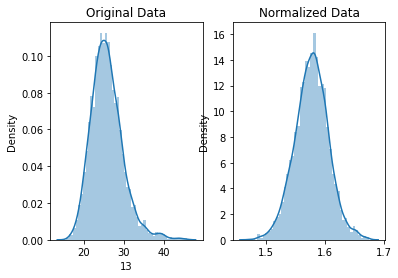

In [ ]:
#Column 13
normalized_data13 = stats.boxcox(imputed_hackathon['13']) #applying boxcox transformation

fig, ax=plt.subplots(1,2)

sns.distplot(imputed_hackathon['13'], ax=ax[0])   #Original data visualization
ax[0].set_title("Original Data")
sns.distplot(normalized_data13[0] , ax=ax[1])  
ax[1].set_title("Normalized Data")

In [ ]:
new_13 = normalized_data13[0]
new_13

array([1.58898637, 1.60044752, 1.57731382, ..., 1.54440412, 1.57925084,
       1.53889217])

In [ ]:
imputed_hackathon['13'] = new_13
imputed_hackathon

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,39.0,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,195.0,0.782441,2.088317,1.588986,80.0,0.787698,0.0
1,0.0,46.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,250.0,0.782760,2.115856,1.600448,95.0,0.787644,0.0
2,1.0,48.0,1.0,1.0,20.0,0.000000,0.0,0.0,0.0,245.0,0.782872,2.113572,1.577314,75.0,0.787281,0.0
3,0.0,61.0,3.0,1.0,30.0,0.000000,0.0,1.0,0.0,225.0,0.783176,2.144218,1.599513,65.0,0.788701,1.0
4,0.0,46.0,3.0,1.0,23.0,0.000000,0.0,0.0,0.0,285.0,0.782912,2.122480,1.559281,85.0,0.788081,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.029615,0.0,0.0,0.0,248.0,0.782927,2.093754,1.549424,84.0,0.788123,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.000000,0.0,0.0,0.0,210.0,0.782856,2.128784,1.520122,86.0,0.787946,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,269.0,0.782964,2.120309,1.544404,80.0,0.788807,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.000000,0.0,1.0,0.0,185.0,0.783068,2.149548,1.579251,67.0,0.787409,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

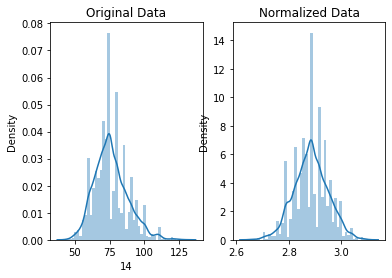

In [ ]:
#Column 14
normalized_data14 = stats.boxcox(imputed_hackathon['14']) #applying boxcox transformation

fig, ax=plt.subplots(1,2)

sns.distplot(imputed_hackathon['14'], ax=ax[0])   #Original data visualization
ax[0].set_title("Original Data")
sns.distplot(normalized_data14[0] , ax=ax[1])  
ax[1].set_title("Normalized Data")

In [ ]:
new_14 = normalized_data14[0]

In [ ]:
imputed_hackathon['14'] = new_14
imputed_hackathon

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,39.0,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,195.0,0.782441,2.088317,1.588986,2.913060,0.787698,0.0
1,0.0,46.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,250.0,0.782760,2.115856,1.600448,2.983063,0.787644,0.0
2,1.0,48.0,1.0,1.0,20.0,0.000000,0.0,0.0,0.0,245.0,0.782872,2.113572,1.577314,2.886139,0.787281,0.0
3,0.0,61.0,3.0,1.0,30.0,0.000000,0.0,1.0,0.0,225.0,0.783176,2.144218,1.599513,2.825188,0.788701,1.0
4,0.0,46.0,3.0,1.0,23.0,0.000000,0.0,0.0,0.0,285.0,0.782912,2.122480,1.559281,2.938032,0.788081,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.029615,0.0,0.0,0.0,248.0,0.782927,2.093754,1.549424,2.933181,0.788123,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.000000,0.0,0.0,0.0,210.0,0.782856,2.128784,1.520122,2.942815,0.787946,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,269.0,0.782964,2.120309,1.544404,2.913060,0.788807,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.000000,0.0,1.0,0.0,185.0,0.783068,2.149548,1.579251,2.838243,0.787409,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

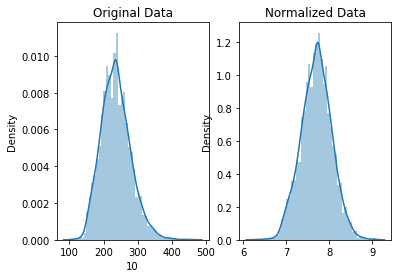

In [ ]:
#Column 15
normalized_data10 = stats.boxcox(imputed_hackathon['10']) #applying boxcox transformation

fig, ax=plt.subplots(1,2)

sns.distplot(imputed_hackathon['10'], ax=ax[0])   #Original data visualization
ax[0].set_title("Original Data")
sns.distplot(normalized_data10[0] , ax=ax[1])  
ax[1].set_title("Normalized Data")

In [ ]:
new_10 = normalized_data10[0]

In [ ]:
imputed_hackathon['10'] = new_10
imputed_hackathon

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,39.0,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,7.361698,0.782441,2.088317,1.588986,2.913060,0.787698,0.0
1,0.0,46.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,7.837147,0.782760,2.115856,1.600448,2.983063,0.787644,0.0
2,1.0,48.0,1.0,1.0,20.0,0.000000,0.0,0.0,0.0,7.797955,0.782872,2.113572,1.577314,2.886139,0.787281,0.0
3,0.0,61.0,3.0,1.0,30.0,0.000000,0.0,1.0,0.0,7.633796,0.783176,2.144218,1.599513,2.825188,0.788701,1.0
4,0.0,46.0,3.0,1.0,23.0,0.000000,0.0,0.0,0.0,8.093658,0.782912,2.122480,1.559281,2.938032,0.788081,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.029615,0.0,0.0,0.0,7.821553,0.782927,2.093754,1.549424,2.933181,0.788123,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.000000,0.0,0.0,0.0,7.502025,0.782856,2.128784,1.520122,2.942815,0.787946,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,7.980049,0.782964,2.120309,1.544404,2.913060,0.788807,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.000000,0.0,1.0,0.0,7.262771,0.783068,2.149548,1.579251,2.838243,0.787409,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

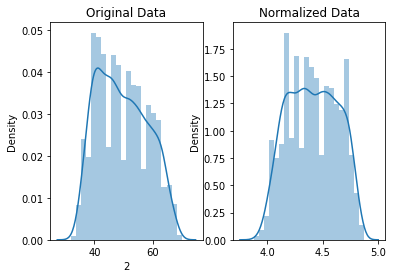

In [ ]:
#Column 2
normalized_data2 = stats.boxcox(imputed_hackathon['2']) #applying boxcox transformation

fig, ax=plt.subplots(1,2)

sns.distplot(imputed_hackathon['2'], ax=ax[0])   #Original data visualization
ax[0].set_title("Original Data")
sns.distplot(normalized_data2[0] , ax=ax[1])  
ax[1].set_title("Normalized Data")

In [ ]:
new_2 = normalized_data2[0]
new_2

array([4.12455274, 4.33394551, 4.38828626, ..., 4.49088449, 4.15652444,
       4.12455274])

In [ ]:
imputed_hackathon['2'] = new_2
imputed_hackathon

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,4.124553,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,7.361698,0.782441,2.088317,1.588986,2.913060,0.787698,0.0
1,0.0,4.333946,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,7.837147,0.782760,2.115856,1.600448,2.983063,0.787644,0.0
2,1.0,4.388286,1.0,1.0,20.0,0.000000,0.0,0.0,0.0,7.797955,0.782872,2.113572,1.577314,2.886139,0.787281,0.0
3,0.0,4.697060,3.0,1.0,30.0,0.000000,0.0,1.0,0.0,7.633796,0.783176,2.144218,1.599513,2.825188,0.788701,1.0
4,0.0,4.333946,3.0,1.0,23.0,0.000000,0.0,0.0,0.0,8.093658,0.782912,2.122480,1.559281,2.938032,0.788081,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,4.388286,2.0,1.0,20.0,0.029615,0.0,0.0,0.0,7.821553,0.782927,2.093754,1.549424,2.933181,0.788123,0.0
4236,0.0,4.277345,1.0,1.0,15.0,0.000000,0.0,0.0,0.0,7.502025,0.782856,2.128784,1.520122,2.942815,0.787946,0.0
4237,0.0,4.490884,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,7.980049,0.782964,2.120309,1.544404,2.913060,0.788807,0.0
4238,1.0,4.156524,3.0,0.0,0.0,0.000000,0.0,1.0,0.0,7.262771,0.783068,2.149548,1.579251,2.838243,0.787409,0.0


In [ ]:
skewValue = imputed_hackathon.skew()   #Checking for Skewness
skewValue

1      0.285997
2     -0.003800
3      0.697413
4      0.023595
5      1.251336
6      5.586462
7     12.912160
8      0.818827
9      5.995907
10     0.000940
11     0.012929
12    -0.006514
13    -0.008434
14    -0.000850
15    -0.213172
16     1.940516
dtype: float64

In [ ]:
normal_hackathon = imputed_hackathon     #Checkpoint 2

## **Checking Kurtosis**

In [ ]:
kur = kurtosis(normal_hackathon, fisher = True)
print(kur)

[-1.91826355e+00 -1.03547069e+00 -6.56919905e-01 -1.99944367e+00
  1.04444619e+00  2.91991376e+01  1.64605931e+02 -1.32999739e+00
  3.39254684e+01  1.30908844e-01 -1.33360278e-01  3.63598349e-01
  3.92506810e-01  8.54423479e-02  3.11378887e+00  1.76293881e+00]


In [ ]:
#As Kurtosis values are in proper range, we do not do any more normalization

## **Checking Correlation Matrix for Feature Selection**

In [ ]:
# Create correlation matrix
corr_matrix = normal_hackathon.corr().abs()

#Selecting upper traingular region
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,NaN,0.028802,0.017188,0.197026,0.316023,0.052203,0.004550,0.005853,0.015693,0.067024,0.006579,0.066445,0.113083,0.119809,0.017060,0.088374
2,NaN,NaN,0.162961,0.209607,0.187956,0.119698,0.056018,0.305505,0.100727,0.281929,0.389124,0.210541,0.140517,0.016006,0.106547,0.223648
3,NaN,NaN,NaN,0.018297,0.008197,0.010689,0.035139,0.080753,0.038214,0.022024,0.126741,0.060851,0.126356,0.054207,0.025112,0.053571
4,NaN,NaN,NaN,NaN,0.767055,0.048621,0.032980,0.103710,0.044285,0.048514,0.130487,0.111644,0.172065,0.069960,0.066742,0.019448
5,NaN,NaN,NaN,NaN,NaN,0.045847,0.032711,0.066444,0.037086,0.023504,0.080317,0.056703,0.092026,0.082361,0.081098,0.057646
6,NaN,NaN,NaN,NaN,NaN,NaN,0.115008,0.259125,0.051584,0.078624,0.219360,0.179849,0.091864,0.007443,0.008343,0.086805
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.074791,0.006955,0.002014,0.056475,0.043431,0.013424,0.017687,0.011213,0.061823
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.077752,0.158164,0.678800,0.596209,0.291873,0.143590,0.077800,0.177458
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028517,0.093684,0.045563,0.074309,0.049952,0.329781,0.097344
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.220336,0.177058,0.138634,0.088734,0.030450,0.077891


In [ ]:
#First we check for inter correlated columns. Those with high correlation were then compared with the correlation values of the final column.

#Those which had the minimum impact on final output were then dropped and evaluation was checked for different permutations and combinations.


## **Scaling (StandardScaler)**

In [ ]:
scaler = StandardScaler()

In [ ]:
numerical = normal_hackathon[['2','10','11','12','13','14','15']]
categorical = normal_hackathon[[1,'3','4','5','6','7','8','9','16']]

,1,3,4,5,6,7,8,9,16
0,1.0,4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,1.0,0,1.0,20.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,3,1.0,30.0,0.000000,0.0,1.0,0.0,1.0
4,0.0,3,1.0,23.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4235,0.0,2,1.0,20.0,0.029615,0.0,0.0,0.0,0.0
4236,0.0,0,1.0,15.0,0.000000,0.0,0.0,0.0,0.0
4237,0.0,2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4238,1.0,3,0.0,0.0,0.000000,0.0,1.0,0.0,0.0


In [ ]:
numerical_scaled = scaler.fit_transform(numerical)
numerical_scaled = pd.DataFrame(numerical_scaled)
numerical_scaled

,0,1,2,3,4,5,6
0,-1.293724,-0.965269,-1.468875,-1.141808,0.408246,0.434565,-0.109654
1,-0.350548,0.385375,-0.427578,-0.066835,0.809167,1.509589,-0.191232
2,-0.105779,0.274039,-0.061976,-0.155990,-0.000071,0.021149,-0.736564
3,1.285045,-0.192299,0.929824,1.040208,0.776460,-0.914873,1.396926
4,-0.350548,1.114066,0.067614,0.191727,-0.630878,0.818054,0.465443
...,...,...,...,...,...,...,...
4235,-0.105779,0.341078,0.117877,-0.929582,-0.975681,0.743560,0.528859
4236,-0.605495,-0.566630,-0.115446,0.437797,-2.000696,0.891503,0.262116
4237,0.356358,0.791329,0.239797,0.106980,-1.151282,0.434565,1.556295
4238,-1.149713,-1.246299,0.576221,1.248273,0.067688,-0.714392,-0.543341


In [ ]:
final = pd.concat([numerical_scaled, categorical], ignore_index = True, axis = 1)
final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.293724,-0.965269,-1.468875,-1.141808,0.408246,0.434565,-0.109654,1.0,4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,-0.350548,0.385375,-0.427578,-0.066835,0.809167,1.509589,-0.191232,0.0,2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,-0.105779,0.274039,-0.061976,-0.155990,-0.000071,0.021149,-0.736564,1.0,0,1.0,20.0,0.000000,0.0,0.0,0.0,0.0
3,1.285045,-0.192299,0.929824,1.040208,0.776460,-0.914873,1.396926,0.0,3,1.0,30.0,0.000000,0.0,1.0,0.0,1.0
4,-0.350548,1.114066,0.067614,0.191727,-0.630878,0.818054,0.465443,0.0,3,1.0,23.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-0.105779,0.341078,0.117877,-0.929582,-0.975681,0.743560,0.528859,0.0,2,1.0,20.0,0.029615,0.0,0.0,0.0,0.0
4236,-0.605495,-0.566630,-0.115446,0.437797,-2.000696,0.891503,0.262116,0.0,0,1.0,15.0,0.000000,0.0,0.0,0.0,0.0
4237,0.356358,0.791329,0.239797,0.106980,-1.151282,0.434565,1.556295,0.0,2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4238,-1.149713,-1.246299,0.576221,1.248273,0.067688,-0.714392,-0.543341,1.0,3,0.0,0.0,0.000000,0.0,1.0,0.0,0.0


## **Encoding**

In [ ]:
le = LabelEncoder()
#Column 3 has categorical data, 0,1,1.974,2,3
#We Encode this to 0,1,2,3,4

In [ ]:
normal_hackathon['3'] = le.fit_transform(normal_hackathon['3'])
normal_hackathon['3'].unique() 

array([4, 2, 0, 3, 1])

## **Train Test Split**

In [ ]:
X = final.drop(15, axis = 1)
y = final[15]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

## **Baseline Model - Dummy Classifier**

In [ ]:
dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

In [ ]:
dummy_prediction = dummy.predict(X_test)
dummy_prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy_score(y_test, dummy_prediction)

0.8537735849056604

# **Creating a Model Comparison Table**

In [ ]:
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

In [ ]:
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
mlp_model = MLPClassifier()

In [ ]:
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    mlp = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)



    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()],
                                       
                                      'Multi Layer Perceptron':[mlp['test_accuracy'].mean(),
                                                              mlp['test_precision'].mean(),
                                                              mlp['test_recall'].mean(),
                                                              mlp['test_f1_score'].mean()]},
                                      
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
     # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

In [ ]:
models_evaluation(X_test, y_test , 5)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Multi Layer Perceptron,Best Score
Accuracy,0.854717,0.861321,0.757547,0.852830,0.836792,0.836792,Support Vector Classifier
Precision,0.486667,1.000000,0.233226,0.466667,0.351544,0.351544,Support Vector Classifier
Recall,0.064516,0.051613,0.264516,0.045161,0.161290,0.161290,Decision Tree
F1 Score,0.106665,0.097037,0.245817,0.079820,0.213672,0.213672,Decision Tree


In [ ]:
#F1 scores are very low
#Here, we see that accuracy is almost same as the Dummy Classfier Accuracy.
#This means that Data Imbalance exists

In [ ]:
rfc_model.fit(X_train, y_train)   #Creating a sample RF model for Imbalance Check
pred = rfc_model.predict(X_test)

In [ ]:
confusion = confusion_matrix(y_test, pred )
confusion     #Here, we see that imbalance exists
#Thus, Data Resampling is required

array([[895,  10],
       [146,   9]])

## **Handling Imbalance**

In [ ]:
sm = SMOTE(sampling_strategy = 'auto')

In [ ]:
#Using Oversampling strategy
X_res, y_res = sm.fit_resample(X,y)
X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)
y_res.columns = ['15']

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
res_hackathon = pd.concat([X_res, y_res], axis = 1)
res_hackathon

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.293724,-0.965269,-1.468875,-1.141808,0.408246,0.434565,-0.109654,1.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.350548,0.385375,-0.427578,-0.066835,0.809167,1.509589,-0.191232,0.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.105779,0.274039,-0.061976,-0.155990,-0.000071,0.021149,-0.736564,1.000000,0.000000,1.0,20.0,0.0,0.0,0.0,0.0,0.0
3,1.285045,-0.192299,0.929824,1.040208,0.776460,-0.914873,1.396926,0.000000,3.000000,1.0,30.0,0.0,0.0,1.0,0.0,1.0
4,-0.350548,1.114066,0.067614,0.191727,-0.630878,0.818054,0.465443,0.000000,3.000000,1.0,23.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7187,0.498116,-0.014063,-0.112974,-0.772846,-0.364801,-0.049143,-0.536519,1.000000,0.000000,1.0,20.0,0.0,0.0,0.0,0.0,1.0
7188,1.380173,-0.892152,0.963024,0.384842,1.329905,-0.360460,-0.632024,1.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7189,0.398292,1.353765,0.068591,0.715862,0.431004,-1.386329,-0.150459,0.119466,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7190,0.067317,1.042008,0.803687,0.770872,0.263601,2.067010,0.238471,0.346966,3.346966,1.0,20.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,random_state = 42) #Train test split for resampled

In [ ]:
#Checking accuracies in model comparison table
models_evaluation(X_test, y_test , 5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Multi Layer Perceptron,Best Score
Accuracy,0.673005,0.675786,0.712482,0.795911,0.531156,0.531156,Random Forest
Precision,0.661996,0.663359,0.708509,0.810131,0.689379,0.689379,Random Forest
Recall,0.699598,0.707432,0.720878,0.770222,0.096460,0.096460,Random Forest
F1 Score,0.679898,0.684311,0.713538,0.789275,0.168989,0.168989,Random Forest


In [ ]:
dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

In [ ]:
dummy_prediction = dummy.predict(X_test)
dummy.score(X_test, y_test)    #Reduced Dummy Classifier accuracy indicates that less imbalance Exists

0.4961067853170189

**We see that accuracy in the model comparison table has significantly dropped after resampling. This means that, accuracy is not the correct evalutation metric. 
On the other hand, f1 score has shown an improvement.
So, we choose f1_score as our evaluation metric.**

In [ ]:
#Random Forests Classifier gives the best F1 Score (0.7652)
#Trying out more Algorithms for better F1_score
#XGBoost
xgb = XGBClassifier(objective= 'binary:logistic', n_estimators=70, seed=101).fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
xgpred = xgb.predict(X_test)

In [ ]:
f1_score(xgpred, y_test)     #Better accuracy than RandomForestClassifier

0.8106575963718822

## **Hyperparameter Tuning to improve the model**

In [ ]:
params = {
    'learning_rate' :[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth' :[3,4,5,6,8,10,12,15],
    'min_child_weight' :[1,3,5,7],
    'gamma' :[0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree' :[0.3,0.4,0.5,0.7]
}

In [ ]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter = 5, scoring = 'roc_auc', n_jobs = -1, cv=5,verbose = 3)

In [ ]:
random_search.fit(X_res, y_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=70,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sca...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [ ]:
random_search.best_estimator_      #gives the best estimator values for xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=70, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=101,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=70, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=101,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=70, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=101,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predicted = xgb.predict(X_test)
predicted

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
f1_score(predicted, y_test)      #F1 score increased by 10% !!!
#This is probably our FINAL SCORE !!!

0.9007009345794392

## **Creating Pipelines for different methods to compare with different normalization and Scaling Techniques**

In [ ]:
pipeline_lr = Pipeline([('scaler1', StandardScaler()),
                        ('pca1',PCA(n_components = 2)),
                        ('lr_classifier',LogisticRegression(random_state = 0))])

In [ ]:
pipeline_dt = Pipeline([('scaler2', MinMaxScaler()),
                       ('lda2', LinearDiscriminantAnalysis(n_components = 1)),
                       ('dt_classifier', DecisionTreeClassifier())])

In [ ]:
pipeline_rf = Pipeline([('scaler3', StandardScaler()),
                       ('pca2', PCA(n_components = 2)),
                       ('rf_classifier', RandomForestClassifier())])

In [ ]:
pipeline_svm = Pipeline([('scaler4', StandardScaler()),
                        ('lda2', LinearDiscriminantAnalysis(n_components = 1)),
                        ('svm_classifier', SVC())])

In [ ]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svm]

In [ ]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2:'Random Classifier', 3: 'Support Vector Classifier', 4: 'XGB Classifier'}
for pipe in pipelines:
    pipe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

In [ ]:
for i, model in enumerate(pipelines):
    pred = model.predict(X_test)
    print('{} F1 scores: {}'.format(pipe_dict[i], f1_score(pred, y_test))) 

Logistic Regression F1 scores: 0.6313993174061433
Decision Tree F1 scores: 0.6018983807928532
Random Classifier F1 scores: 0.6524822695035462
Support Vector Classifier F1 scores: 0.6982803543512246


In [ ]:
#Thus, we see that all these F1 scores are less than XGBoost Classifier used above.
#Thus XGBoost remains our final model.

In [ ]:
#Now, we drop rows, which have been determined by using various permutations upon abserving the correlation matrix, to improve the score.

In [ ]:
X_res = X_res.drop([2,13],axis = 1)
X_res

,0,1,3,4,5,6,7,8,9,10,11,12,14
0,-1.293724,-0.965269,-1.141808,0.408246,0.434565,-0.109654,1.000000,4.000000,0.0,0.0,0.0,0.0,0.0
1,-0.350548,0.385375,-0.066835,0.809167,1.509589,-0.191232,0.000000,2.000000,0.0,0.0,0.0,0.0,0.0
2,-0.105779,0.274039,-0.155990,-0.000071,0.021149,-0.736564,1.000000,0.000000,1.0,20.0,0.0,0.0,0.0
3,1.285045,-0.192299,1.040208,0.776460,-0.914873,1.396926,0.000000,3.000000,1.0,30.0,0.0,0.0,0.0
4,-0.350548,1.114066,0.191727,-0.630878,0.818054,0.465443,0.000000,3.000000,1.0,23.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7187,0.498116,-0.014063,-0.772846,-0.364801,-0.049143,-0.536519,1.000000,0.000000,1.0,20.0,0.0,0.0,0.0
7188,1.380173,-0.892152,0.384842,1.329905,-0.360460,-0.632024,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7189,0.398292,1.353765,0.715862,0.431004,-1.386329,-0.150459,0.119466,0.000000,0.0,0.0,0.0,0.0,0.0
7190,0.067317,1.042008,0.770872,0.263601,2.067010,0.238471,0.346966,3.346966,1.0,20.0,0.0,0.0,0.0


In [ ]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_res, y_res, random_state =42)

In [ ]:
xgb.fit(Xd_train, yd_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=70, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=101,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predict = xgb.predict(Xd_test)

In [ ]:
f1_score(predict, yd_test)

0.8952270081490105

In [ ]:
#After trying out feature selection using correlation matrix, we find out that the score does not increase.
#So, our final score using XGBClassifier is    90.07 %.

## **Final Score = 90.07%**

### **Neural Network**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hack = pd.read_csv("/content/drive/My Drive/ML projects/reshackathon.csv")
hack.describe()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000
mean,3595.500000,0.470292,4.458865,1.927498,0.500256,9.609273,0.038109,0.008899,0.386237,0.033529,7.728983,0.782949,2.120938,1.579333,2.886087,0.746158,0.500000
std,2076.295901,0.492846,0.211989,1.005547,0.499575,12.332136,0.185640,0.088739,0.481986,0.172490,0.335547,0.000303,0.025317,0.027125,0.060587,0.000482,0.500035
min,0.000000,0.000000,3.876497,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.270154,0.781710,2.009503,1.471571,2.649799,0.742926,0.000000
25%,1797.750000,0.000000,4.305885,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.513500,0.782741,2.104024,1.562354,2.845492,0.745915,0.000000
50%,3595.500000,0.000000,4.479886,2.000000,0.571761,0.571761,0.000000,0.000000,0.000000,0.000000,7.731311,0.782942,2.120431,1.580355,2.886139,0.746191,0.500000
75%,5393.250000,1.000000,4.631699,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,7.951230,0.783167,2.137825,1.596950,2.923268,0.746391,1.000000
max,7191.000000,1.000000,4.876495,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,9.084094,0.783801,2.208954,1.674422,3.104761,0.748082,1.000000


In [ ]:
dataset = hack.values
x = dataset[:,1:16]
x

array([[1.        , 4.12455274, 4.        , ..., 1.58898637, 2.91306014,
        0.74608161],
       [0.        , 4.33394551, 2.        , ..., 1.60044752, 2.98306326,
        0.74604187],
       [1.        , 4.38828626, 1.        , ..., 1.57731382, 2.88613946,
        0.74577529],
       ...,
       [0.        , 4.75947808, 1.        , ..., 1.60616055, 2.77076556,
        0.74604277],
       [1.        , 4.31235151, 2.        , ..., 1.60200564, 2.95743773,
        0.74665983],
       [0.        , 4.5941135 , 3.        , ..., 1.56858217, 2.8761675 ,
        0.74661133]])

In [ ]:
y = dataset[:,16]
y

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)
X_scale

array([[1.        , 0.24805645, 1.        , ..., 0.57882471, 0.57864486,
        0.61200005],
       [0.        , 0.45744968, 0.33333333, ..., 0.63532488, 0.73251088,
        0.604293  ],
       [1.        , 0.51179054, 0.        , ..., 0.52128236, 0.51947351,
        0.55259355],
       ...,
       [0.        , 0.88298317, 0.        , ..., 0.66348851, 0.26588303,
        0.60446633],
       [1.        , 0.43585562, 0.33333333, ..., 0.64300596, 0.67618626,
        0.7241361 ],
       [0.        , 0.71761824, 0.66666667, ..., 0.47823781, 0.49755525,
        0.71472979]])

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3,random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5,random_state=42)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(5034, 15) (1079, 15) (1079, 15) (5034,) (1079,) (1079,)


In [ ]:
from keras.models import Sequential  
from keras.layers import Dense
from keras.layers import Dropout 
from keras import regularizers
from keras.layers import BatchNormalization 

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', 
    patience=8, 
    min_delta=0.001, 
    mode='min')

In [ ]:
model_3 = Sequential()
model_3.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(15,)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))
model_3.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model_3.add(BatchNormalization())
#model_3.add(Dropout(0.3))
model_3.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model_3.add(BatchNormalization())
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['BinaryAccuracy'])

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1024      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                2

In [ ]:
hist = model_3.fit(X_train, Y_train,batch_size=64, epochs=150,validation_data=(X_val, Y_val))

Epoch 1/150
79/79 [==============================] - 1s 7ms/step - loss: 1.9759 - binary_accuracy: 0.6216 - val_loss: 1.7934 - val_binary_accuracy: 0.5116
Epoch 2/150
79/79 [==============================] - 0s 2ms/step - loss: 1.5900 - binary_accuracy: 0.6504 - val_loss: 1.5120 - val_binary_accuracy: 0.5505
Epoch 3/150
79/79 [==============================] - 0s 2ms/step - loss: 1.3508 - binary_accuracy: 0.6625 - val_loss: 1.3172 - val_binary_accuracy: 0.5894
Epoch 4/150
79/79 [==============================] - 0s 2ms/step - loss: 1.1924 - binary_accuracy: 0.6712 - val_loss: 1.1793 - val_binary_accuracy: 0.6006
Epoch 5/150
79/79 [==============================] - 0s 2ms/step - loss: 1.0706 - binary_accuracy: 0.6742 - val_loss: 1.0777 - val_binary_accuracy: 0.6089
Epoch 6/150
79/79 [==============================] - 0s 3ms/step - loss: 0.9788 - binary_accuracy: 0.6720 - val_loss: 0.9748 - val_binary_accuracy: 0.6571
Epoch 7/150
79/79 [==============================] - 0s 3ms/step - los

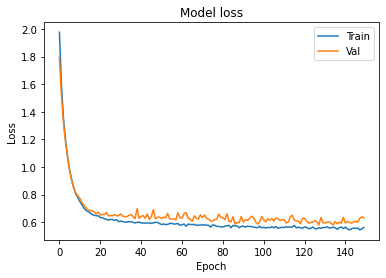

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

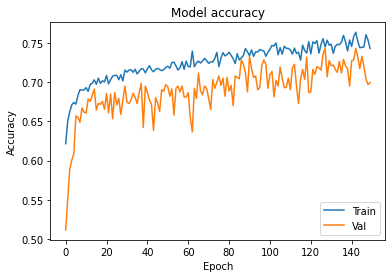

In [ ]:
plt.plot(hist.history['binary_accuracy'])
plt.plot(hist.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model_3.evaluate(X_test, Y_test)[1]
#Deep learning gives a lower accuracy

34/34 [==============================] - 0s 1ms/step - loss: 0.5725 - binary_accuracy: 0.7600


0.7599629163742065

## **Final Score = 90.07**